# Peramalan Recursive multi-step 

## Latar Belakang

Peramalan multi-step rekursif mengggunaan nilai-nilai dari hasil prediksi dari langkah-langkah waktu sebelumnya sebagai masukan untuk meramalkan nilai-nilai  waktu berikutnya. Model awalnya memprediksi satu langkah ke depan dan kemudian menggunakan ramalan itu sebagai masukan untuk langkah waktu berikutnya, proses ini terus diulang ini sampai dengan k langkah yang ditentukan
Untuk memperjelas, karena nilai $t_{n-1}$ diperlukan untuk memprediksi $t_n$, dan $t_{n-1}$ tidak diketahui, maka diterapkan proses rekursif, di mana setiap prediksi baru didasarkan pada prediksi sebelumnya.


![Alt text](https://skforecast.org/0.9.1/img/diagram-recursive-mutistep-forecasting.png "a Data deret Berkala")

Gambar. peramalan recursive multi-step forecasting.

Saat menggunakan model pembelajaran mesin untuk peramalan multi-step rekursif, salah satu tantangan utamanya adalah mengubah data deret waktu menjadi format matriks yang menghubungkan setiap nilai  dengan nilai nilai sebelumnya (lag). Proses ini butuh rekayasa fitur yang cermat untuk memastikan model dapat secara akurat menangkap pola yang mendasari dalam data

![Alt text](https://skforecast.org/0.9.1/img/matrix_transformation_with_exog_variable.png "a Data deret Berkala")


Dengan menggunakan kelas ForecasterAutoreg dan ForecasterAutoregCustom, model pembelajaran mesin untuk peramalan multi-step rekursif dapat dibangun dengan mudah. Kelas-kelas ini dapat secara otomatis mengubah data deret waktu menjadi format matriks yang sesuai sebagai input ke algoritma pembelajaran mesin, dan menyediakan berbagai pilihan untuk mengatur parameter model guna mencapai kinerja terbaik.


Library yang diperlukan  adalah skforecast. Sehingga perlu diinstalasi

In [2]:
%%capture
!pip install skforecast

In [2]:
# Libraries
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

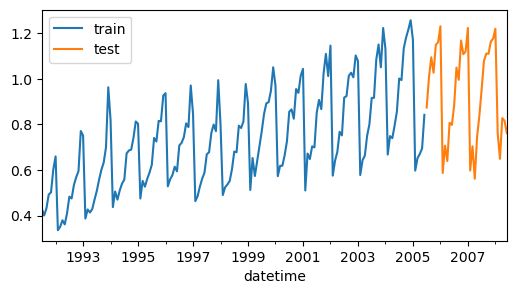

In [3]:
# Download data
# ==============================================================================
url = (
    'https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/'
    'data/h2o.csv'
)
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d')
data = data.set_index('datetime')
#data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.legend();

In [28]:
# Create and fit forecaster
# ==============================================================================

forecaster = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=123),
                 lags      = 15
             )

forecaster.fit(y=data_train)
#forecaster

In [22]:
# Predict
# ==============================================================================
predictions = forecaster.predict(steps=36)
predictions.head(5)

2005-07-01    0.921840
2005-08-01    0.954921
2005-09-01    1.101716
2005-10-01    1.139829
2005-11-01    1.140665
Freq: MS, Name: pred, dtype: float64

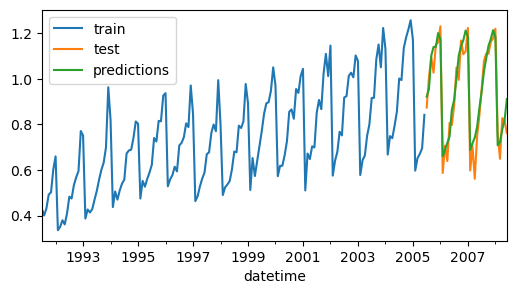

In [13]:
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [14]:
# Prediction error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test,
                y_pred = predictions
            )
print(f"Test error (mse): {error_mse}")

Test error (mse): 0.00429855684785846


In [35]:
mape=mean_absolute_percentage_error(
                y_true = data_test,
                y_pred = predictions
            )

In [37]:
print(f"Test error (MAPE): {mape}")

Test error (MAPE): 0.0643455920129417


## Menentukan lag penting dalam peramalan time series
Menentukan fitur penting adalah teknik yang digunakan dalam pembelajaran mesin untuk menentukan relevansi atau kepentingan setiap fitur (atau variabel) dalam prediksi model. Dengan kata lain, ini mengukur seberapa besar kontribusi setiap fitur terhadap keluaran model.

Pentingnya fitur dapat digunakan untuk berbagai tujuan, seperti mengidentifikasi fitur yang paling relevan untuk prediksi tertentu, memahami perilaku model, dan memilih kumpulan fitur terbaik untuk tugas tertentu. Ini juga dapat membantu mengidentifikasi potensi bias atau kesalahan dalam data yang digunakan untuk melatih model. Penting untuk dicatat bahwa pentingnya fitur bukanlah ukuran definitif dari kausalitas. Hanya karena suatu fitur diidentifikasi sebagai penting, bukan berarti fitur tersebut menyebabkan hasilnya. Faktor lain, seperti variabel pengganggu, mungkin juga berperan.

Pada kasus peramalan data diatas, kita telah menentukan banyaknya lag yang akan digunakan untuk memprediksi nilai yang akan datang. Berdasarkan lag lag tersebut kita akan dapat mengetahui lag mana yang paling menentukan dalam hasil prediksi data yang akan datang dengan metode get

In [15]:
forecaster.get_feature_importances()

,feature,importance
11,lag_12,0.807098
1,lag_2,0.085160
13,lag_14,0.016328
2,lag_3,0.013407
9,lag_10,0.012751
0,lag_1,0.012340
14,lag_15,0.009979
10,lag_11,0.009019
8,lag_9,0.007831
7,lag_8,0.007141


Untuk mengetahui bagaimana data yang telah ditransformasikan, metode create_train_X_y dapat digunakan untuk menghasilkan matriks yang digunakan model pelatihan. Dengan pengetahuian ini memungkinkan untuk memperoleh gambaran data ketika melakukan proses pelatihan.

In [16]:
# Create training matrices
# ==============================================================================
X_train, y_train = forecaster.create_train_X_y(data_train)
X_train.head()

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15
datetime,,,,,,,,,,,,,,,
1992-10-01,0.534761,0.475463,0.483389,0.410534,0.361801,0.379808,0.351348,0.336220,0.660119,0.602652,0.502369,0.492543,0.432159,0.400906,0.429795
1992-11-01,0.568606,0.534761,0.475463,0.483389,0.410534,0.361801,0.379808,0.351348,0.336220,0.660119,0.602652,0.502369,0.492543,0.432159,0.400906
1992-12-01,0.595223,0.568606,0.534761,0.475463,0.483389,0.410534,0.361801,0.379808,0.351348,0.336220,0.660119,0.602652,0.502369,0.492543,0.432159
1993-01-01,0.771258,0.595223,0.568606,0.534761,0.475463,0.483389,0.410534,0.361801,0.379808,0.351348,0.336220,0.660119,0.602652,0.502369,0.492543
1993-02-01,0.751503,0.771258,0.595223,0.568606,0.534761,0.475463,0.483389,0.410534,0.361801,0.379808,0.351348,0.336220,0.660119,0.602652,0.502369
